**Importar o arquivo CSV**


In [8]:
from google.colab import files
uploaded = files.upload()


Saving Atividade 05. usa_housing.csv to Atividade 05. usa_housing (2).csv


**Estatísticas Descritivas**

In [10]:
import pandas as pd

df = pd.read_csv('Atividade 05. usa_housing.csv')

desc_stats = df.describe()
print("\nEstatísticas Descritivas:")
print(desc_stats)


Estatísticas Descritivas:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                  

**Avaliação do Modelo**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecionar as features (variáveis independentes) e o target (variável dependente)
features = ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
            'Avg. Area Number of Bedrooms', 'Area Population']
target = ['Avg. Area Number of Rooms','Price']

X = df[features]
y = df[target]

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("\nAvaliação do Modelo:")
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("R-quadrado (R2):",r2)


Avaliação do Modelo:
Erro Quadrático Médio (MSE): 5044504650.447259
Raiz do Erro Quadrático Médio (RMSE): 50222.030277793725
R-quadrado (R2): 0.9589985853417144


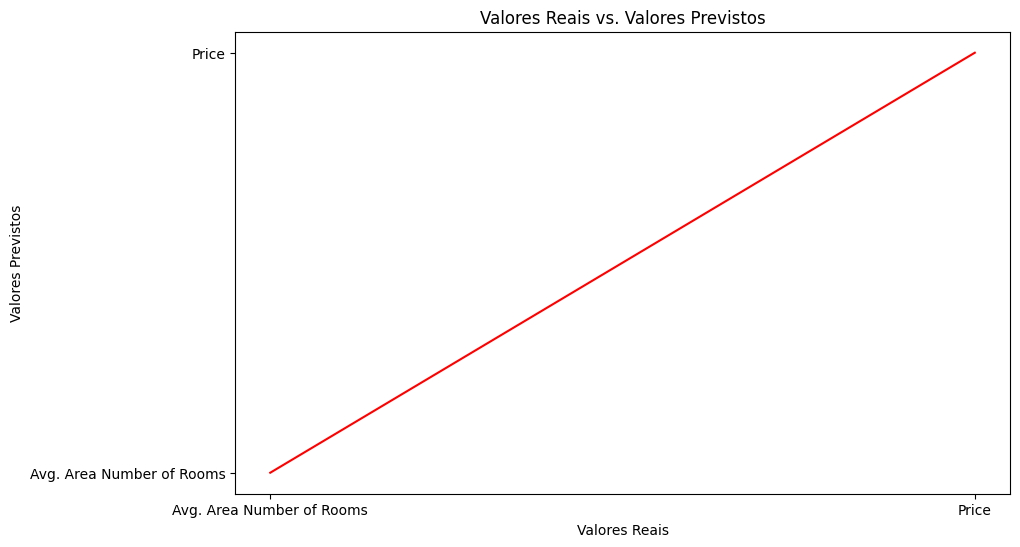

In [12]:
import matplotlib.pyplot as plt

# Gráfico de dispersão dos valores reais vs. valores previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Previstos")
plt.title("Valores Reais vs. Valores Previstos")

# Adicionar uma linha diagonal para referência
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')

plt.show()

**Logistic Regression Model Evaluation**


Logistic Regression Model Evaluation:
Accuracy: 0.526
Precision: 0.5237613751263903
Recall: 0.9942418426103646
F1-score: 0.686092715231788


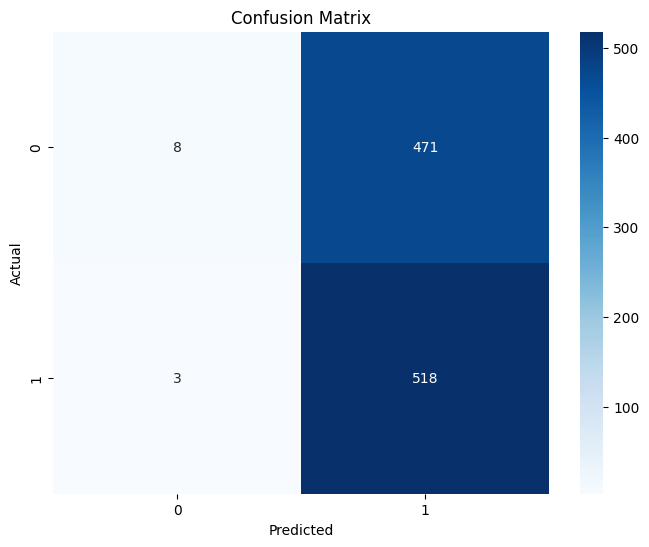

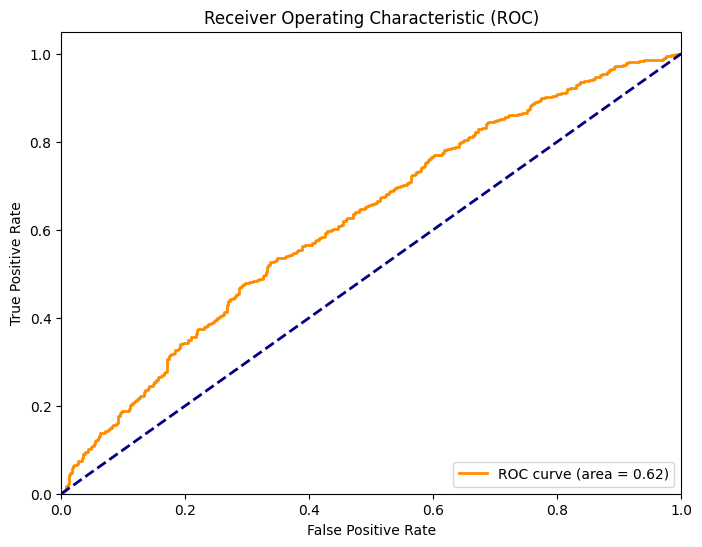

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

# Assuming 'Price' is a continuous variable, we'll first categorize it for logistic regression
# You might need to adjust the threshold based on your data
median_price = df['Price'].median()
df['Price_Category'] = (df['Price'] > median_price).astype(int)  # 1 if above median, 0 otherwise

# Now, our target variable is 'Price_Category'
target = 'Price_Category'
y = df[target]

# Split the data (using the same split as before for comparison)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\nLogistic Regression Model Evaluation:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()